### CASO UBER

In [1]:
import seaborn as sns
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir("D:/Python/2. Nivel II/2/datos")

In [3]:
uber = pd.read_csv("uber-raw-data-apr14.csv")

In [5]:
uber.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [6]:
len(uber)

564516

**Objetivo**: realizar la segmentación de rutas para la empresa UBER

**¿Cómo notifico a un proveedor de servicio de taxi de una alerta de usuario?**

In [7]:
uber.drop(["Date/Time","Base"],axis=1,inplace=True)

In [8]:
uber.head()

,Lat,Lon
0,40.7690,-73.9549
1,40.7267,-74.0345
2,40.7316,-73.9873
3,40.7588,-73.9776
4,40.7594,-73.9722


In [9]:
uber.isnull().sum()

Lat    0
Lon    0
dtype: int64

In [10]:
xs = uber.values

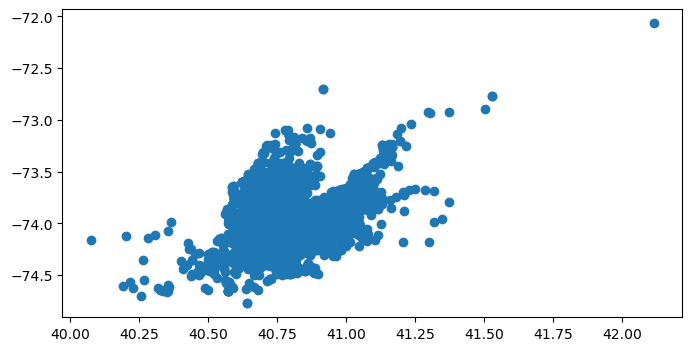

In [11]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(xs[:,0],xs[:,1])
plt.show()

**Usamos el escalamiento por normalización**

**Paso 1: escalamiento de los datos**

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
ms = MinMaxScaler()

In [14]:
X = ms.fit_transform(xs)

In [15]:
X

array([[0.34060772, 0.30236081],
       [0.31990997, 0.2729523 ],
       [0.32230758, 0.29039051],
       ...,
       [0.3285218 , 0.28979939],
       [0.2949063 , 0.30768094],
       [0.30097372, 0.30018103]])

In [16]:
df_uber = pd.DataFrame(X,
                       columns=uber.columns)

In [17]:
df_uber.head()

,Lat,Lon
0,0.340608,0.302361
1,0.319910,0.272952
2,0.322308,0.290391
3,0.335617,0.293974
4,0.335910,0.295969


**Paso 2: visualización**

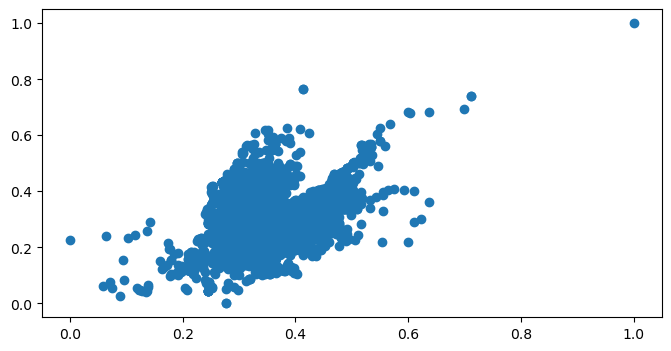

In [18]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(X[:,0],X[:,1])
plt.show()

**Paso 3: número óptimo de clúster**

**Nota**: cómputo (infraestructura) que utiliza la librería.

- **sklearn**: utiliza un nodo para procesar los cálculos.
- **h2o**: utiliza un clúster (crea) a nivel de CPU (es decir, si nuestro ordenador cuenta con 12 nodos realiza un cluster con estos).
- **RAPIDS**: utiliza un clúster (crea) a nivel de GPU (es decir, si contamos con un GPU de 3400 nodos realiza un clúster con estos).
- **Automl(Azure)**: realizar una configuración de tu clúster de proceso (Microsoft nos ofrece diferentes alternativas de cómputo en la nube).
- **SageMaker(AWS)**: realizar una configuración de tu clúster de proceso (Amazon nos ofrece diferentes alternativas de cómputo en la nube).

**Nota**: utilizar silueta como criterio para establece el número óptimo de k tiene un alto costo computacional.

**Método del codo o inertia**

In [19]:
from sklearn.metrics import euclidean_distances, silhouette_score
from sklearn.cluster import KMeans

In [20]:
coef_inertia_uber =[]

In [21]:
for i in range(2,11):
    kmeans_model=KMeans(n_clusters=i,
                       init="k-means++",
                       max_iter=300,
                       n_init=10,
                       random_state=2023)
    kmeans_model.fit(df_uber)
    coef_inertia_uber.append(kmeans_model.inertia_)

In [22]:
coef_inertia_uber

[259.61342185401793,
 178.25175347705007,
 145.71345153499664,
 116.97118780050639,
 91.81982594223877,
 76.02647896746126,
 66.4965182582136,
 58.45399221258721,
 52.53670257246725]

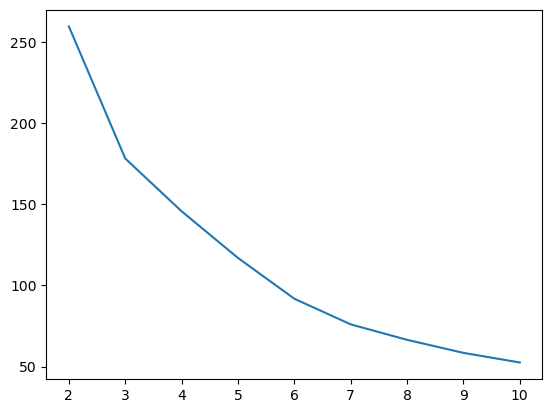

In [23]:
plt.plot(range(2,11),
        coef_inertia_uber)
plt.show()

**Nota** concluímos que el número óptimo de k es =3

**Paso 4: identificar los k grupos**

In [24]:
kmeans_model=KMeans(n_clusters=3,
                       init="k-means++",
                       max_iter=300,
                       n_init=10,
                       random_state=2023)

In [25]:
kmeans_model=kmeans_model.fit(df_uber)

In [26]:
y_kmeans= kmeans_model.predict(df_uber) + 1

In [27]:
y_kmeans

array([1, 2, 2, ..., 2, 2, 2])

In [28]:
data_values = uber.values

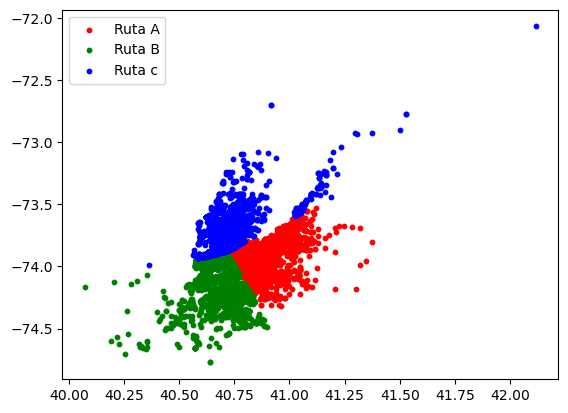

In [29]:
plt.scatter(data_values[y_kmeans==1,0],
           data_values[y_kmeans==1,1],
           s=10,
           c="red",
           label="Ruta A")
plt.scatter(data_values[y_kmeans==2,0],
           data_values[y_kmeans==2,1],
           s=10,
           c="green",
           label="Ruta B")
plt.scatter(data_values[y_kmeans==3,0],
           data_values[y_kmeans==3,1],
           s=10,
           c="blue",
           label="Ruta c")
plt.legend()
plt.show()

**Solicitud de servicio de taxi realizada por Allison**

In [30]:
Allison = pd.DataFrame({"Lat":[40.7690],"Lon":[-73.9548]})

In [31]:
sol_allison = kmeans_model.predict(ms.transform(Allison)) +1; print(sol_allison)

[1]


**Ruta en la que se encuentra Manuel**

In [32]:
Manuel = pd.DataFrame({"Lat":[40.7688],"Lon":[-73.9612]})

In [33]:
Chof = kmeans_model.predict(ms.transform(Manuel)) +1; print(Chof)

[1]


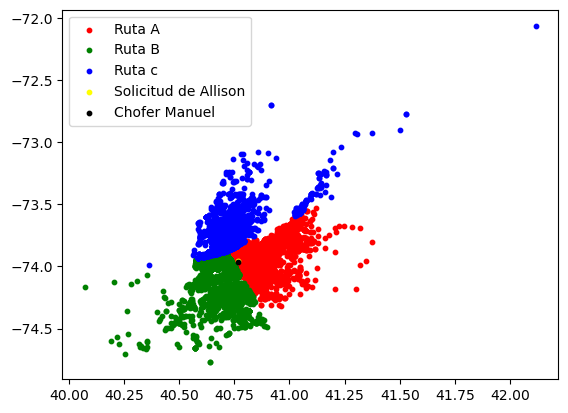

In [35]:
plt.scatter(data_values[y_kmeans==1,0],
           data_values[y_kmeans==1,1],
           s=10,
           c="red",
           label="Ruta A")
plt.scatter(data_values[y_kmeans==2,0],
           data_values[y_kmeans==2,1],
           s=10,
           c="green",
           label="Ruta B")
plt.scatter(data_values[y_kmeans==3,0],
           data_values[y_kmeans==3,1],
           s=10,
           c="blue",
           label="Ruta c")

solicitud_v = Allison.values
plt.scatter(solicitud_v[sol_allison==1,0],
           solicitud_v[sol_allison==1,1],
           s=10,
           c="Yellow",
           label="Solicitud de Allison")

chofer_v = Manuel.values
plt.scatter(chofer_v[Chof==1,0],
           chofer_v[Chof==1,1],
           s=10,
           c="Black",
           label="Chofer Manuel")

plt.legend()
plt.show()

**Nota**: h2o es una librería desarrollada en Java.

### Clúster K-means con h2o

In [ ]:
#pip install h2o

In [36]:
import h2o

In [37]:
h2o.init(nthreads=-1,
        max_mem_size="8g")

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.231-b11, mixed mode)
  Starting server from C:\ProgramData\Anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\SOCIAL~1\AppData\Local\Temp\tmpg1jegwx9
  JVM stdout: C:\Users\SOCIAL~1\AppData\Local\Temp\tmpg1jegwx9\h2o_SOCIAL_DATA_started_from_python.out
  JVM stderr: C:\Users\SOCIAL~1\AppData\Local\Temp\tmpg1jegwx9\h2o_SOCIAL_DATA_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Bogota
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.5
H2O_cluster_version_age:,"1 year, 5 months and 30 days !!!"
H2O_cluster_name:,H2O_from_python_SOCIAL_DATA_wv3gge
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.111 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"accepting new members, healthy"


In [38]:
from h2o.estimators.kmeans import H2OKMeansEstimator

In [39]:
km = H2OKMeansEstimator(categorical_encoding="one_hot_explicit",
                       k=3,
                       seed=2023,
                       max_iterations=100)

In [40]:
predictores = df_uber.columns.tolist()

In [41]:
predictores

['Lat', 'Lon']

**Nota**: h2o es una librería desarrollada en JAVA y no podemos aplicar una función a un objeto DF de python.

In [42]:
uberh2o=h2o.H2OFrame(df_uber)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [43]:
type(uberh2o)

h2o.frame.H2OFrame

In [44]:
type(df_uber)

pandas.core.frame.DataFrame

In [45]:
km.train(x=predictores,
        training_frame=uberh2o)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [46]:
km.scoring_history()

,,timestamp,duration,iterations,number_of_reassigned_observations,within_cluster_sum_of_squares
0,,2023-02-04 12:58:52,0.215 sec,0.0,NaN,NaN
1,,2023-02-04 12:58:53,0.826 sec,1.0,564516.0,1.182756e+06
2,,2023-02-04 12:58:53,1.025 sec,2.0,1326.0,9.379497e+05
3,,2023-02-04 12:58:53,1.069 sec,3.0,537.0,9.255432e+05
4,,2023-02-04 12:58:53,1.108 sec,4.0,911.0,9.181153e+05
5,,2023-02-04 12:58:53,1.145 sec,5.0,1489.0,9.071347e+05
6,,2023-02-04 12:58:53,1.194 sec,6.0,1187.0,8.989819e+05
7,,2023-02-04 12:58:53,1.249 sec,7.0,1144.0,8.957878e+05
8,,2023-02-04 12:58:53,1.279 sec,8.0,1118.0,8.930789e+05
9,,2023-02-04 12:58:53,1.302 sec,9.0,1512.0,8.917066e+05


In [47]:
cluster = km.predict(uberh2o) +1

kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [48]:
cluster_df= h2o.h2o.as_list(cluster,use_pandas=True)

In [49]:
uber["Cluster"]=cluster_df.values

In [50]:
uber.head(n=30)

,Lat,Lon,Cluster
0,40.7690,-73.9549,1
1,40.7267,-74.0345,1
2,40.7316,-73.9873,1
3,40.7588,-73.9776,1
4,40.7594,-73.9722,1
5,40.7383,-74.0403,1
6,40.7223,-73.9887,1
7,40.7620,-73.9790,1
8,40.7524,-73.9960,1
9,40.7575,-73.9846,1
